# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних
df = pd.read_csv(r'D:/DataLovesAcademy/data/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додаткові колонки
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

In [2]:
df.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,weekday,weekday_num,week,year,day
datetime,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,Saturday,5,52,2011,1
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,Saturday,5,52,2011,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2,Saturday,5,52,2011,1
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3,Saturday,5,52,2011,1
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4,Saturday,5,52,2011,1


## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

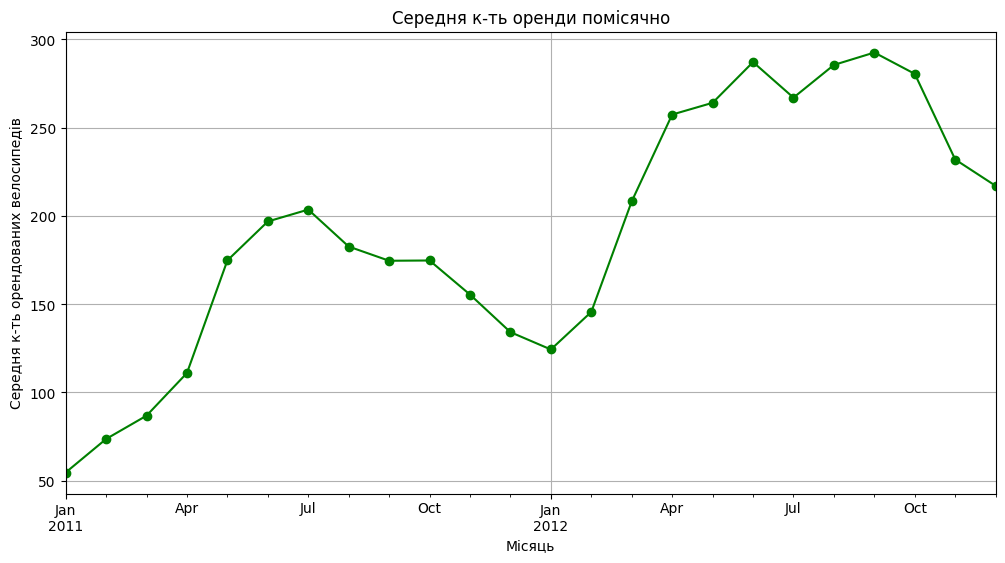

In [8]:
# Використовуючи Pandas (DataFrame.plot())

monthly_rent = df['count'].resample('ME').mean()
monthly_rent.plot(
    kind='line',
    color='green',
    marker='o',
    figsize=(12, 6),
    title='Cередня к-ть оренди помісячно',
    xlabel='Місяць',
    ylabel='Середня к-ть орендованих велосипедів',
    grid=True
);

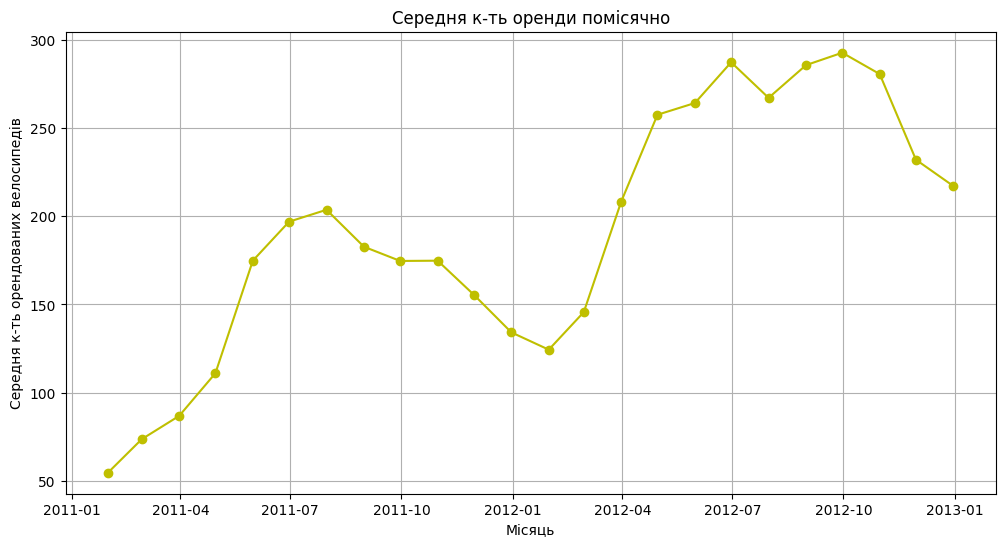

In [9]:
# Використовуючи Matplotlib безпосередньо
plt.figure(figsize=(12, 6))
plt.plot(monthly_rent, 'o-y')
plt.title('Cередня к-ть оренди помісячно')
plt.xlabel('Місяць')
plt.ylabel('Середня к-ть орендованих велосипедів')
plt.grid(True);

Опишіть свої спостереження: 
чим відрізняються 2 побудованих графіки? - загалом графіки передають одне й те саме, але є різниця в деталях: (1) підписи осі ОХ - більше подобається в Пандасе, (2) Сітка - більше подобається в plt оскільки легше сприймати точки на графіку, (3) і відімнність щодо дотику кінцівок графіку до країв. Більше подобається в plt - якось цілісніше виглядає
Який вам більше подобається? - два проти одного, тому оберу plt :)

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [10]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень1

''

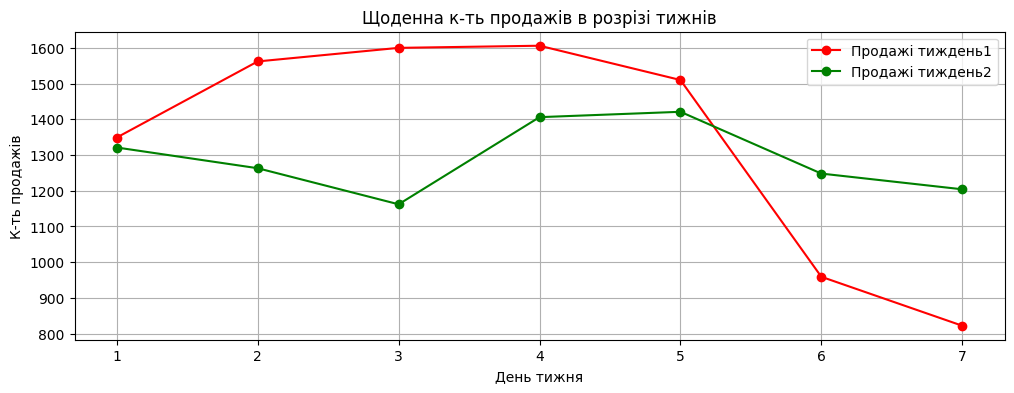

In [26]:
plt.figure(figsize=(12, 4))
plt.plot(days, sales_week1, 'o-',label='Продажі тиждень1', color='red')
plt.plot(days, sales_week2, 'o-',label='Продажі тиждень2', color='green')
plt.legend()
plt.grid(True)
plt.title('Щоденна к-ть продажів в розрізі тижнів')
plt.xlabel('День тижня')
plt.ylabel('К-ть продажів')
;

Дайте відповіді на питання

Судячи з графіку, в який тиждень проодажі були стабільніше? на другому тижні продажі стабільшіні
Чи можете ви підкріпити свій висновок обчисленнями? - так
Якими саме? через середню к-ть продажів та стандартне відхилення

In [33]:
# Обчислення для першого тижня
mean_week1 = round(np.mean(sales_week1),2)
std_week1 = round(np.std(sales_week1),2)
print(mean_week1, std_week1)

# Обчислення для другого тижня
mean_week2 = round(np.mean(sales_week2),2)
std_week2 = round(np.std(sales_week2),2)
print(mean_week2, std_week2)

1344.0 300.0
1289.29 90.91


Да, тут напевно сережне нам не інформативне, а от стандарте відхилення чітко показує, що друний тиждень стабільніший через те, що значення менше ніж ніж на першому тижні, а отже розкид даних навколо середнього теж менший.

## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за сезонами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

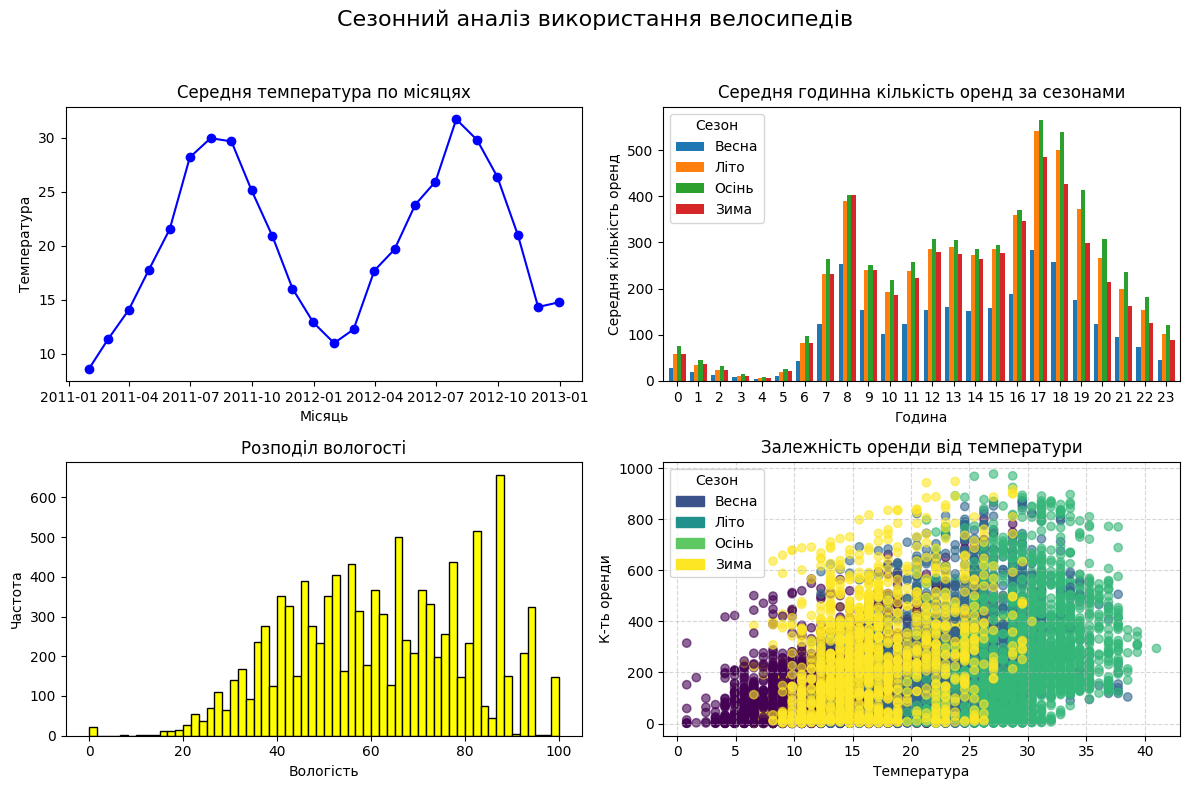

In [65]:
plt.figure(figsize=(12, 8))

# Лінійний графік середньої температури помісячно.
plt.subplot(2, 2, 1)
mean_temp=df['temp'].resample('ME').mean()
plt.plot(mean_temp.index, mean_temp, 'o-', color='blue')
plt.title('Середня температура по місяцях')
plt.xlabel('Місяць')
plt.ylabel('Температура')

# Стовпчикова діаграма середньої годинної кількості оренд за сезонами.
plt.subplot(2, 2, 2)
mean_hour_season = df.groupby(['season', 'hour'])['count'].mean().round(2)
df_plot = mean_hour_season.unstack(level=0)
df_plot.plot(kind='bar', width=0.8, ax=plt.gca()) # ax=plt.gca() щоб графік відобразився в цьому subplot
plt.title('Середня годинна кількість оренд за сезонами')
plt.xlabel('Година')
plt.ylabel('Середня кількість оренд')
plt.xticks(rotation=0)
plt.legend(title='Сезон', labels=['Весна', 'Літо', 'Осінь', 'Зима'])

# Гістограма вологості за всіма погодинними вимірами.
plt.subplot(2, 2, 3)
plt.hist(df['humidity'], bins=60, color='yellow', edgecolor='black')
plt.title('Розподіл вологості')
plt.xlabel('Вологість')
plt.ylabel('Частота')

# Scatter plot температури vs кількості оренд.
plt.subplot(2, 2, 4)
plt.scatter(df['temp'], df['count'], c=df['season'], alpha=0.6, cmap='viridis')
plt.title('Залежність оренди від температури')
plt.xlabel('Температура')
plt.ylabel('К-ть оренди')
plt.grid(True, linestyle='--', alpha=0.5)
# Додавання легенди
season_names = {1: 'Весна', 2: 'Літо', 3: 'Осінь', 4: 'Зима'}
colors = plt.cm.viridis(df['season'].unique() / 4)
# Створення списку елементів легенди
import matplotlib.patches as mpatches
legend_elements = [
    mpatches.Patch(color=colors[i], label=season_names[i+1])
    for i in range(len(colors))
]
plt.legend(handles=legend_elements, title='Сезон')

# Заголовок всієї фігури
plt.suptitle('Сезонний аналіз використання велосипедів', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

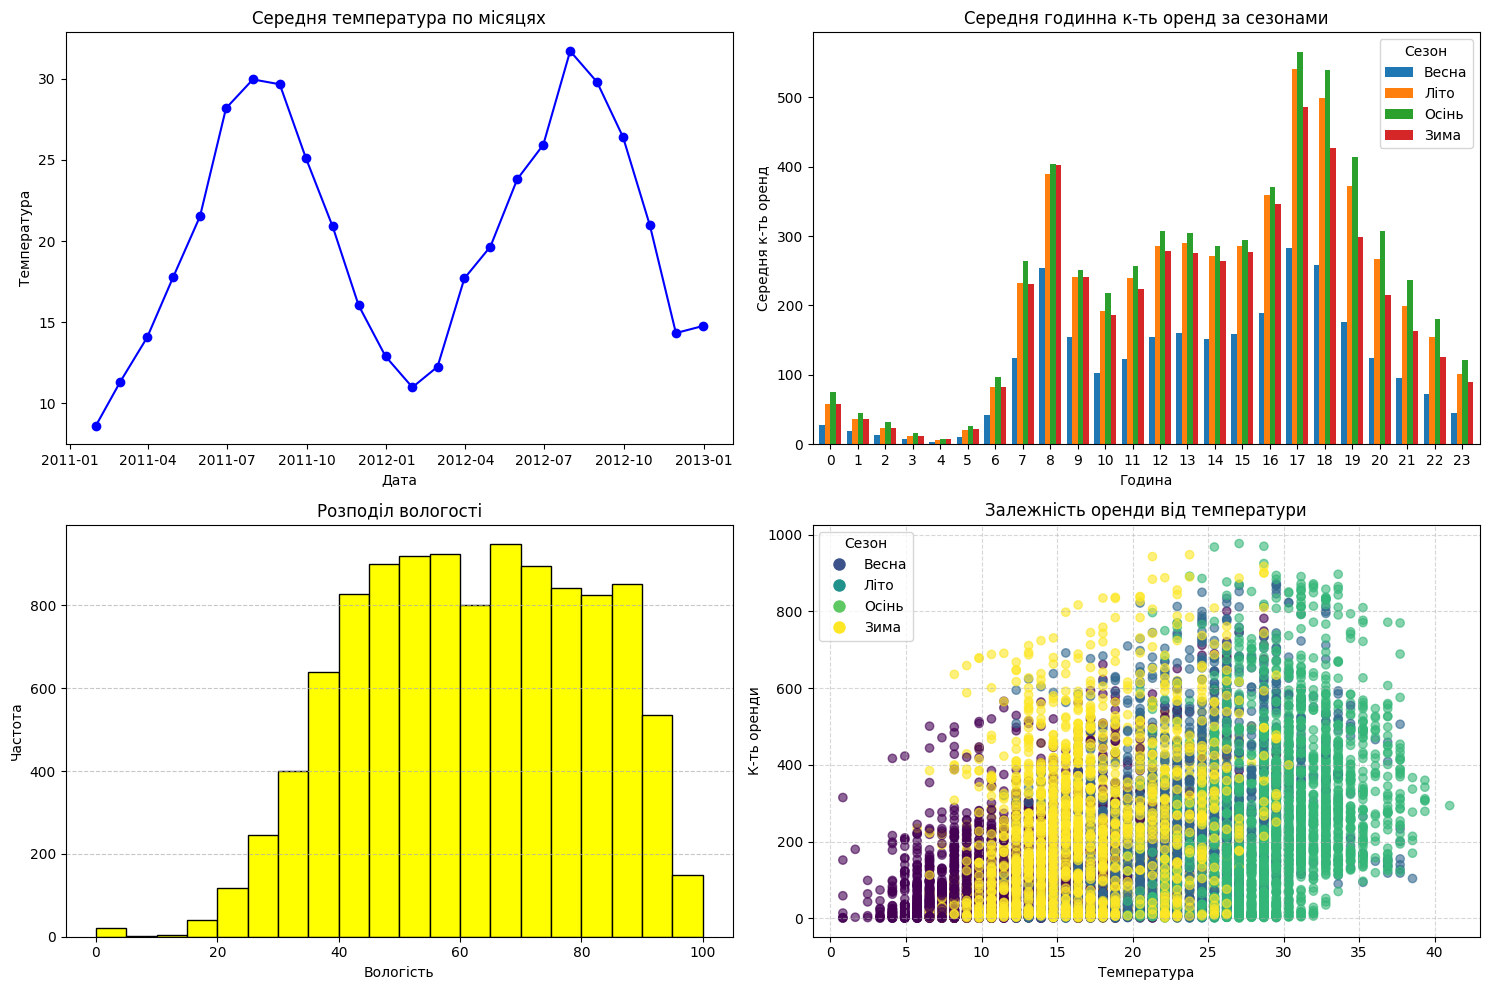

In [63]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Лінійний графік середньої температури помісячно.
mean_temp = df['temp'].resample('ME').mean()
ax[0, 0].plot(mean_temp.index, mean_temp, 'o-', color='blue')
ax[0, 0].set_title('Середня температура по місяцях')
ax[0, 0].set_xlabel('Дата')
ax[0, 0].set_ylabel('Температура')
#ax[0, 0].grid(True, linestyle='--', alpha=0.5)

# Стовпчикова діаграма середньої годинної кількості оренд за сезонами.
mean_hour_season = df.groupby(['season', 'hour'])['count'].mean().round(2)
df_plot = mean_hour_season.unstack(level=0)
df_plot.plot(kind='bar', width=0.8, ax=ax[0, 1])
ax[0, 1].set_title('Середня годинна к-ть оренд за сезонами')
ax[0, 1].set_xlabel('Година')
ax[0, 1].set_ylabel('Середня к-ть оренд')
ax[0, 1].tick_params(axis='x', rotation=0)
ax[0, 1].legend(title='Сезон', labels=['Весна', 'Літо', 'Осінь', 'Зима'])

# Гістограма вологості за всіма погодинними вимірами.
ax[1, 0].hist(df['humidity'], bins=20, color='yellow', edgecolor='black')
ax[1, 0].set_title('Розподіл вологості')
ax[1, 0].set_xlabel('Вологість')
ax[1, 0].set_ylabel('Частота')
ax[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Scatter plot температури vs кількості оренд
scatter = ax[1, 1].scatter(df['temp'], df['count'], c=df['season'], alpha=0.6, cmap='viridis')
ax[1, 1].set_title('Залежність оренди від температури')
ax[1, 1].set_xlabel('Температура')
ax[1, 1].set_ylabel('К-ть оренди')
ax[1, 1].grid(True, linestyle='--', alpha=0.5)

# Додавання легенди для scatter plot
season_names = {1: 'Весна', 2: 'Літо', 3: 'Осінь', 4: 'Зима'}
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=plt.cm.viridis(val / 4), markersize=10)
    for val, label in season_names.items()
]
ax[1, 1].legend(handles=legend_elements, title='Сезон')

plt.tight_layout()
plt.show()


Дайте відповідь на питання своїми словами
Чим відрізняється підхід побудови кількох графіків на одній фігурі з plt.subplots() від plt.subplot()?
plt.subplot() - треба викликаєти її для кожного окремого графіка і обов'язково вказувати позицію.

plt.subplots() - тут ми створюємо всю фігуру та осі одночасно. І через АХ я можу звернутись до конкретного графіка і задати йому потрібні налаштування.

## Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

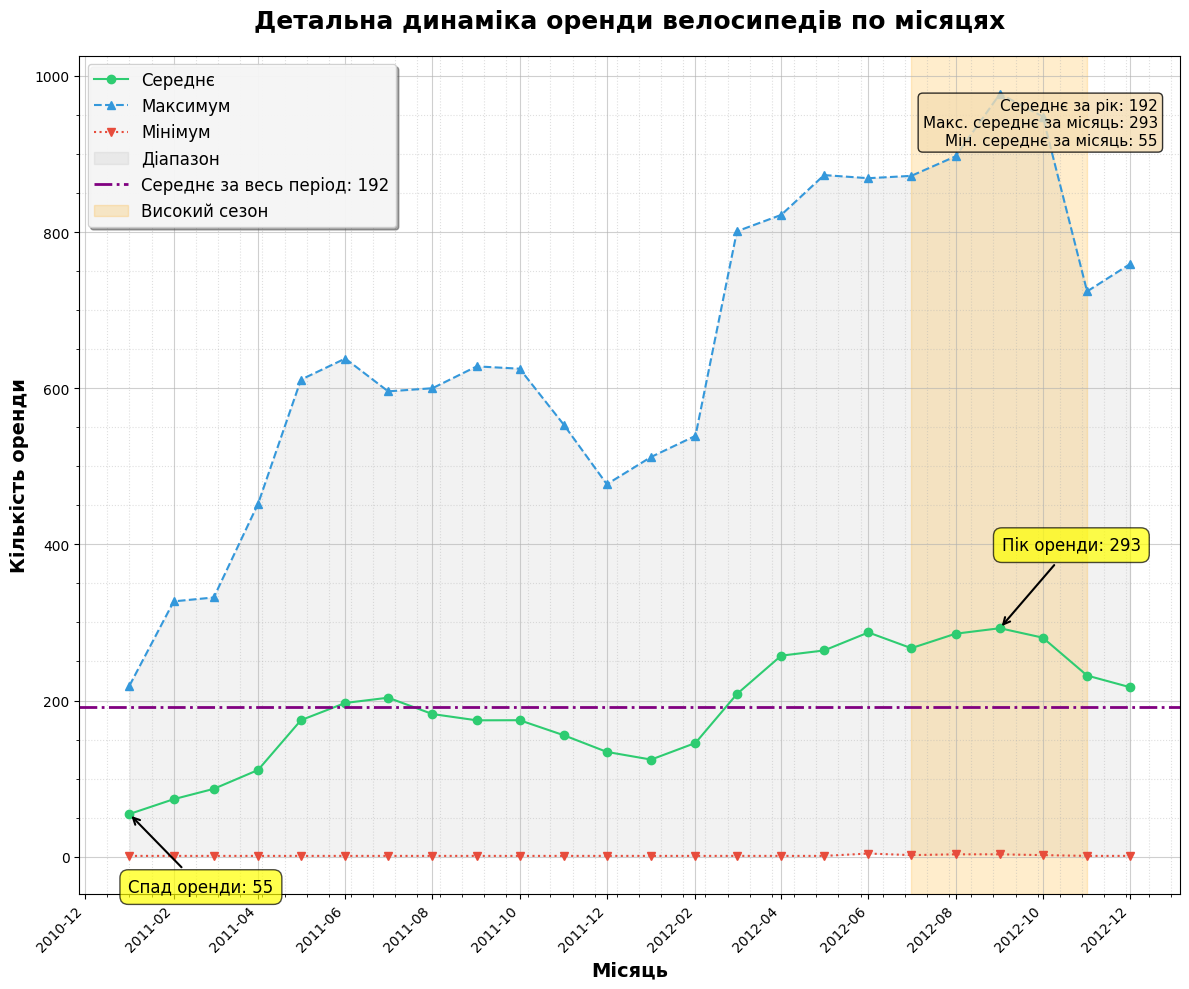

In [74]:
# Обчислення щомісячної статистики: середня, мінімальна та максимальна кількість оренди
monthly_stats = df.groupby(df.index.to_period('M'))['count'].agg(['mean', 'min', 'max']).rename(columns={'mean': 'avg'})
monthly_stats.index = monthly_stats.index.to_timestamp()

# Створення фігури та осей
fig, ax = plt.subplots(figsize=(12, 10))

# Побудова ліній
ax.plot(monthly_stats.index, monthly_stats['avg'], color='#2ECC71', linestyle='-', marker='o', label='Середнє')
ax.plot(monthly_stats.index, monthly_stats['max'], color='#3498DB', linestyle='--', marker='^', label='Максимум')
ax.plot(monthly_stats.index, monthly_stats['min'], color='#E74C3C', linestyle=':', marker='v', label='Мінімум')

# Заливка області між мінімумом та максимумом
ax.fill_between(monthly_stats.index, monthly_stats['min'], monthly_stats['max'], alpha=0.1, color='grey', label='Діапазон')

# Додавання анотацій
max_avg_idx = monthly_stats['avg'].idxmax()
max_avg_val = monthly_stats['avg'].max()
ax.annotate(f'Пік оренди: {max_avg_val:.0f}', xy=(max_avg_idx, max_avg_val),
            xytext=(max_avg_idx + pd.Timedelta(days=50), max_avg_val + 100),
            arrowprops=dict(arrowstyle='->', color='black', lw=1.5),
            fontsize=12, ha='center', bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

min_avg_idx = monthly_stats['avg'].idxmin()
min_avg_val = monthly_stats['avg'].min()
ax.annotate(f'Спад оренди: {min_avg_val:.0f}', xy=(min_avg_idx, min_avg_val),
            xytext=(min_avg_idx + pd.Timedelta(days=50), min_avg_val - 100),
            arrowprops=dict(arrowstyle='->', color='black', lw=1.5),
            fontsize=12, ha='center', bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

# Додавання горизонтальної лінії середнього за весь рік
overall_mean = df['count'].mean()
ax.axhline(y=overall_mean, color='purple', linestyle='-.', linewidth=2,
           label=f'Середнє за весь період: {overall_mean:.0f}')

# ДОДАВАННЯ ВЕРТИКАЛЬНОЇ ОБЛАСТІ
start_date = '2012-07'
end_date = '2012-11'
ax.axvspan(start_date, end_date, alpha=0.2, color='orange', label='Високий сезон')

# Налаштування осей та заголовків
ax.set_title('Детальна динаміка оренди велосипедів по місяцях', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Місяць', fontsize=14, fontweight='bold')
ax.set_ylabel('Кількість оренди', fontsize=14, fontweight='bold')

# Форматування осі X для відображення місяців
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45, ha='right')

# Налаштування сітки
ax.grid(True, which='major', linestyle='-', alpha=0.6)
ax.grid(True, which='minor', linestyle=':', alpha=0.4)
ax.minorticks_on()

# Створення стилізованої легенди
ax.legend(loc='upper left', fontsize=12, shadow=True, frameon=True, fancybox=True, framealpha=0.9)

# Додавання текстового блоку зі статистикою
textstr = f"Середнє за рік: {overall_mean:.0f}\n"
textstr += f"Макс. середнє за місяць: {max_avg_val:.0f}\n"
textstr += f"Мін. середнє за місяць: {min_avg_val:.0f}"
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.98, 0.95, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', horizontalalignment='right', bbox=props)

plt.tight_layout()
plt.show()

Питання для інтерпретації:

Яка перевага додавання анотацій на графік? - вони одразу привертають увагу до головного
Для чого використовується fill_between()? - аби замалювати діапазон між двома показниками і знову таки для актценту уваги саме на цьому іапазоні
Як текстовий блок допомагає в інтерпретації даних? - він описує ключові показники і метрики і дає змогу швидко проаналізувати графік